# Web Scrapping

#Extracting the data from wikipedia

In [51]:
from bs4 import BeautifulSoup            # Import the library to parse the page's HTML
import pandas as pd                      # Import pandas to work with tables (DataFrame)
import matplotlib.pyplot as plt          # Import matplotlib to create graphs
import requests                          # Import the requests library to make HTTP requests

def le_site(url):
  """Makes the HTTP request and returns the BeautifulSoup object of the content."""
  # Add a User-Agent header to mimic a browser request
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
  response = requests.get(url, headers=headers)
  response.raise_for_status() # Raise an exception for HTTP error status codes
  return BeautifulSoup(response.content, 'html.parser')

def func_le_paises():                    # Define the function that will read country data from Wikipedia
  bs = le_site('https://pt.wikipedia.org/wiki/Lista_de_pa%C3%ADses_por_riqueza_total')
                                         # Call the 'le_site' function (defined elsewhere) to get the HTML content of the page

  table = bs.find('table', style='text-align: right')
                                         # Find a table in the HTML with the style 'text-align: right'
  if (table == None):                    # If the table is not found...
    raise Exception("Table not found")
                                         # ...raise an exception with the error message

  corpo = table.find("tbody")            # Inside the table, find the body where the rows are
  if (corpo == None):                    # If the table body is not found...
    raise Exception("Table body not found")
                                         # ...raise an exception reporting the problem

  items = corpo.find_all('tr')           # Find all rows (<tr> tags) in the table

  paises = []                            # Create an empty list to store country data

  # Create a dictionary for mapping Portuguese country names to English
  country_name_mapping = {
      'Mundo': 'World',
      'América do Norte': 'North America',
      'Ásia': 'Asia',
      'Estados Unidos': 'United States',
      'Europa': 'Europe',
      'China': 'China',
      'Japão': 'Japan',
      'Alemanha': 'Germany',
      'Reino Unido': 'United Kingdom',
      'França': 'France',
      'Itália': 'Italy',
      'Oceania': 'Oceania',
      'Canadá': 'Canada',
      'América Latina': 'Latin America',
      'Austrália': 'Australia',
      'Espanha': 'Spain',
      'Coreia do Sul': 'South Korea',
      'Índia': 'India',
      'Taiwan[4]': 'Taiwan',
      'Suíça': 'Switzerland',
      'Países Baixos': 'Netherlands',
      'Bélgica': 'Belgium',
      'África': 'Africa',
      'Brasil': 'Brazil',
      'Rússia': 'Russia',
      'Suécia': 'Sweden',
      'México': 'Mexico',
      'Áustria': 'Austria',
      'Hong Kong[5]': 'Hong Kong',
      'Indonésia': 'Indonesia',
      'Singapura': 'Singapore',
      'Dinamarca': 'Denmark',
      'Noruega': 'Norway',
      'Nova Zelândia': 'New Zealand',
      'Turquia': 'Turkey',
      'Arábia Saudita': 'Saudi Arabia',
      'Grécia': 'Greece',
      'Polónia': 'Poland',
      'Israel': 'Israel',
      'Portugal': 'Portugal',
      'Chile': 'Chile',
      'Irlanda': 'Ireland',
      'África do Sul': 'South Africa',
      'Finlândia': 'Finland',
      'Emirados Árabes Unidos': 'United Arab Emirates',
      'Colômbia': 'Colombia',
      'Malásia': 'Malaysia',
      'Tailândia': 'Thailand',
      'Chéquia': 'Czech Republic',
      'Filipinas': 'Philippines',
      'Peru': 'Peru',
      'Paquistão': 'Pakistan',
      'Argentina': 'Argentina',
      'Roménia': 'Romania',
      'Vietname': 'Vietnam',
      'Hungria': 'Hungary',
      'Kuwait': 'Kuwait',
      'Irão': 'Iran',
      'Iraque': 'Iraq',
      'Catar': 'Qatar',
      'Bangladesh': 'Bangladesh',
      'Marrocos': 'Morocco',
      'Líbia': 'Libya',
      'Argélia': 'Algeria',
      'Egito': 'Egypt',
      'Luxemburgo': 'Luxembourg',
      'Eslováquia': 'Slovakia',
      'Omã': 'Oman',
      'Líbano': 'Lebanon',
      'Nigéria': 'Nigeria',
      'Islândia': 'Iceland',
      'Bulgária': 'Bulgaria',
      'Eslovênia': 'Slovenia',
      'Croácia': 'Croatia',
      'Tunísia': 'Tunisia',
      'Equador': 'Ecuador',
      'Costa Rica': 'Costa Rica',
      'Angola': 'Angola',
      'Uruguai': 'Uruguay',
      'Chipre': 'Cyprus',
      'Sri Lanka': 'Sri Lanka',
      'Panamá': 'Panama',
      'Sérvia': 'Serbia',
      'Jordânia': 'Jordan',
      'Cazaquistão': 'Kazakhstan',
      'El Salvador': 'El Salvador',
      'Estónia': 'Estonia',
      'Honduras': 'Honduras',
      'Quênia': 'Kenya',
      'Lituânia': 'Lithuania',
      'Ucrânia': 'Ukraine',
      'Letónia': 'Latvia',
      'Myanmar': 'Myanmar',
      'Azerbaijão': 'Azerbaijan',
      'Geórgia': 'Georgia',
      'Malta': 'Malta',
      'Bolívia': 'Bolivia',
      'Bahamas': 'Bahamas',
      'Bósnia e Herzegovina': 'Bosnia and Herzegovina',
      'Paraguai': 'Paraguay',
      'Albânia': 'Albania',
      'Turquemenistão': 'Turkmenistan',
      'Nepal': 'Nepal',
      'Ilhas Maurícias': 'Mauritius',
      'Costa do Marfim': "Côte d'Ivoire",
      'Camboja': 'Cambodia',
      'Papua-Nova Guiné': 'Papua New Guinea'
  }

  for item in items:                     # For each row in the table...
    dados = item.find_all('td')          # ...get all cells in the row (<td> tags)
    item_pais = []                       # Create a temporary list to store data for the current row
    for i, dado in enumerate(dados):     # For each cell...
      text = dado.text.replace('\xa0','')
      if i == 1: # Assuming the country name is in the second column (index 1)
          item_pais.append(country_name_mapping.get(text, text)) # Translate if mapping exists, otherwise keep original
      else:
          item_pais.append(text)

    if len(item_pais) > 0:               # If the row has data (is not empty)...
      paises.append(item_pais)           # ...add the country data to the final list

  return paises                          # Return the list with all countries and their data

In [52]:
# Define the mapping for the countries to rename
country_rename_map = {
    'Arábia Saudita': 'Saudi Arabia',
    'Paquistão': 'Pakistan',
    'África do Sul': 'South Africa'
}

# Loop through the DataFrame and rename the countries
for portuguese_name, english_name in country_rename_map.items():
    data['Country'] = data['Country'].replace(portuguese_name, english_name)

# Display the updated DataFrame to verify the changes
display(data.head())

,Position,Country,Total Wealth in Billions (USD)
0,—,World,317.084
1,—,North America,106.513
2,—,Asia,105.946
3,1,United States,98.154
4,—,Europe,85.402


In [48]:
func_le_paises()

[['—', 'World', '317.084\n'],
 ['—', 'North America', '106.513\n'],
 ['—', 'Asia', '105.946\n'],
 ['1', 'United States', '98.154\n'],
 ['—', 'Europe', '85.402\n'],
 ['2', 'China', '51.874\n'],
 ['3', 'Japan', '23.884\n'],
 ['4', 'Germany', '14.499\n'],
 ['5', 'United Kingdom', '14.209\n'],
 ['6', 'France', '13.883\n'],
 ['7', 'Italy', '10.569\n'],
 ['—', 'Oceania', '8.615\n'],
 ['8', 'Canada', '8.319\n'],
 ['—', 'Latin America', '8.055\n'],
 ['9', 'Australia', '7.577\n'],
 ['10', ' Espanha', '7.152\n'],
 ['11', ' Coreia do Sul', '7.107\n'],
 ['12', 'India', '5.972\n'],
 ['13', ' Taiwan[4]', '4.065\n'],
 ['14', ' Suíça', '3.611\n'],
 ['15', 'Netherlands', '3.357\n'],
 ['16', 'Belgium', '2.776\n'],
 ['—', 'Africa', '2.553\n'],
 ['17', 'Brazil', '2.464\n'],
 ['18', 'Russia', '2.240\n'],
 ['19', 'Sweden', '1.920\n'],
 ['20', 'Mexico', '1.729\n'],
 ['21', 'Austria', '1.637\n'],
 ['22', 'Hong Kong', '1.523\n'],
 ['23', ' Indonésia', '1.518\n'],
 ['24', ' Singapura', '1.289\n'],
 ['25', 'Denm

In [53]:
data = pd.DataFrame(func_le_paises(), columns=['Position','Country','Total Wealth in Billions (USD)'])
data.set_index('Position')

,Country,Total Wealth in Billions (USD)
Position,,
—,World,317.084\n
—,North America,106.513\n
—,Asia,105.946\n
1,United States,98.154\n
—,Europe,85.402\n
...,...,...
96,Nepal,35\n
97,Ilhas Maurícias,34\n
98,Costa do Marfim,34\n


# Top 20 Countries by Total Wealth

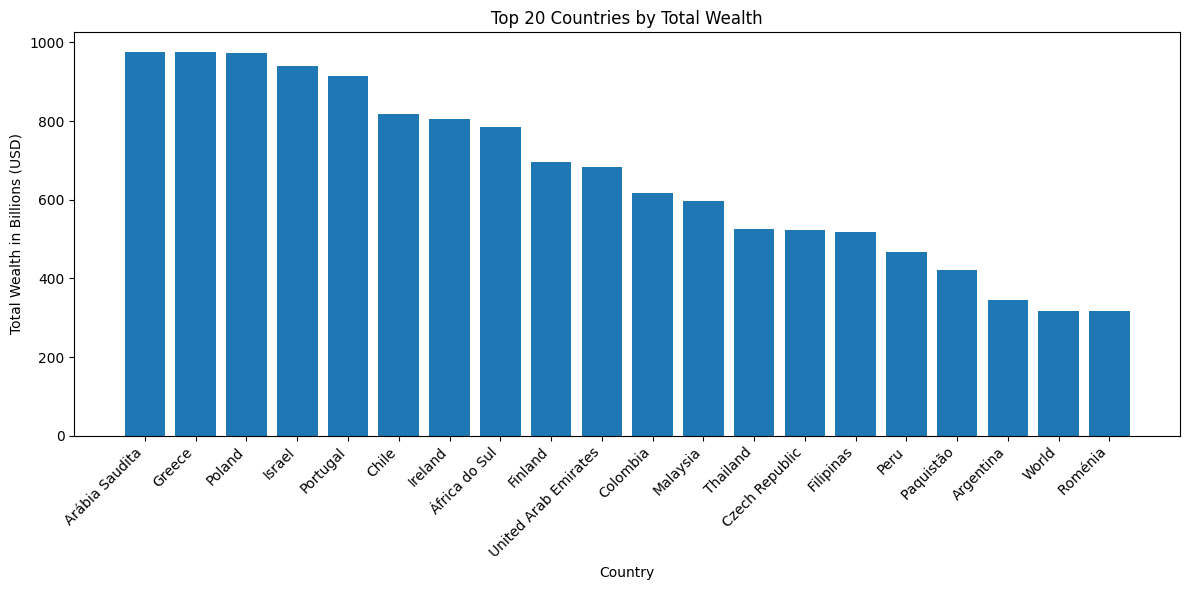

In [54]:
# Convert the 'Total Wealth in Billions (USD)' column to numeric format, handling potential errors
data['Total Wealth in Billions (USD)'] = pd.to_numeric(data['Total Wealth in Billions (USD)'], errors='coerce')

# Remove rows where conversion failed
data.dropna(subset=['Total Wealth in Billions (USD)'], inplace=True)

# Sort the data for better visualization
data_sorted = data.sort_values('Total Wealth in Billions (USD)', ascending=False)

# Select the top N countries to display
top_n = 20
data_top = data_sorted.head(top_n)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(data_top['Country'], data_top['Total Wealth in Billions (USD)'])
plt.xlabel('Country')
plt.ylabel('Total Wealth in Billions (USD)')
plt.title(f'Top {top_n} Countries by Total Wealth')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()